# Binary classification based on Logistic Regression using non-linear regression function

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [2]:
fname_data1 = 'C:/Users/heji0/OneDrive/문서/2021-1/머신러닝/09/assignment_09_data1.txt'
fname_data2 = 'C:/Users/heji0/OneDrive/문서/2021-1/머신러닝/09/assignment_09_data2.txt'

data1 = np.genfromtxt(fname_data1, delimiter=',')
data2 = np.genfromtxt(fname_data2, delimiter=',')

num_data1 = data1.shape[0]
num_data2 = data2.shape[0]

point_x1 = np.zeros(num_data1)
point_y1 = np.zeros(num_data1)
label1   = np.zeros(num_data1)

for i in range(num_data1):

    point_x1[i]  = data1[i,0]
    point_y1[i]  = data1[i,1]
    label1[i]    = data1[i,2]
    
point_x2 = np.zeros(num_data2)
point_y2 = np.zeros(num_data2)
label2   = np.zeros(num_data2)

for i in range(num_data2):

    point_x2[i]  = data2[i,0]
    point_y2[i]  = data2[i,1]
    label2[i]    = data2[i,2]

## plot the data

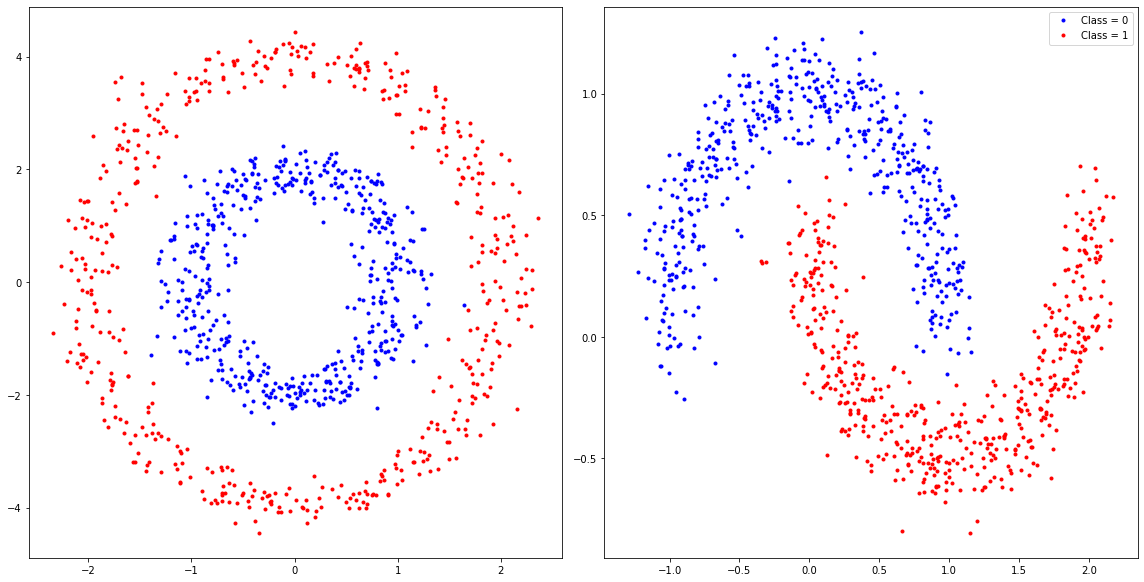

In [3]:
plt.figure(figsize=(16,16))
rx1 = []
ry1 = []
bx1 = []
by1 = []
for i in range(0, num_data1):
    if label1[i] == 0:
        bx1.append(point_x1[i])
        by1.append(point_y1[i])
    else:
        rx1.append(point_x1[i])
        ry1.append(point_y1[i])
plt.subplot(221) 
plt.plot(bx1, by1, 'o', color='blue', label = 'Class = 0', markersize = 3)
plt.plot(rx1, ry1, 'o', color='red', label = 'Class = 1', markersize = 3)    
    
rx2 = []
ry2 = []
bx2 = []
by2 = []
for i in range(0, num_data2):
    if label2[i] == 0:
        bx2.append(point_x2[i])
        by2.append(point_y2[i])
    else:
        rx2.append(point_x2[i])
        ry2.append(point_y2[i])
plt.subplot(222) 
plt.plot(bx2, by2, 'o', color='blue', label = 'Class = 0', markersize = 3)
plt.plot(rx2, ry2, 'o', color='red', label = 'Class = 1', markersize = 3)        
    
plt.legend()
plt.tight_layout()
plt.show()

## define the feature function for each data to obtain the best accuracy

In [13]:
def feature_function1(x, y):
    feature = np.array([1, x, y, x**2, y**2],dtype=object)
    return feature

In [14]:
def feature_function2(x, y):
    feature = np.array([1, x, y, x**2, x**3],dtype=object)
    return feature

## define regression function with a vector $\theta$ model parameters and input data 

In [15]:
def regression_function(theta, feature):
    value = np.matmul(np.transpose(theta), feature) 
    return value

## define sigmoid function with input $x$

In [16]:
def logistic_function(x):
    z = 1 / (1 + np.exp(-x))
    return z

## define loss function with feature and label based on the logistic regression

In [17]:
def compute_loss_feature(theta, feature, label):
    f = regression_function(theta, feature)
    h = logistic_function(f)
    loss = (-label * np.log(h) - (1 - label) * np.log(1 - h)).mean()
    return loss

## define gradient vector for the model parameters $\theta$

In [22]:
def compute_gradient_feature(theta, feature, label):
    f = regression_function(theta, feature)
    h = logistic_function(f)
    num_data = feature[1].shape[0]
    one = np.ones(num_data)
    X = np.column_stack([one,feature[1], feature[2], feature[3],feature[4]])
    dev = np.dot(X.T,(h - label))
    gradient = dev / num_data
    return gradient

## compute the accuracy

In [23]:
def compute_accuracy(theta, feature, label):
    num_data = feature[1].shape[0]
    accuracy = 0
    rf = regression_function(theta, feature)
    for i in range(num_data):
        if(rf[i] >= 0):
            l = 1
        else:
            l = 0
        if(l == label[i]):
            accuracy = accuracy + 1
    accuracy = accuracy / num_data
    return accuracy

## gradient descent for the model parameters $\theta$

In [24]:
num_iteration   = 30000         # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.3           # USE THIS VALUE for the learning rate
theta1          = np.array((0, 0, 0, 0, 0))   # USE THIS VALUE for the initial condition of the model parameters
theta2          = np.array((0, 0, 0, 0, 0))
theta1_iteration = np.zeros((num_iteration, theta1.size))
theta2_iteration = np.zeros((num_iteration, theta2.size))
loss1_iteration = np.zeros(num_iteration)
loss2_iteration = np.zeros(num_iteration)

In [25]:
for i in range(num_iteration):
    theta1 = theta1 - learning_rate * compute_gradient_feature(theta1, feature_function1(point_x1, point_y1), label1)
    loss1 = compute_loss_feature(theta1, feature_function1(point_x1, point_y1), label1)
    theta1_iteration[i] = theta1
    loss1_iteration[i] = loss1

    print("iteration1 = %4d, loss1 = %5.5f" % (i, loss1))
    
for i in range(num_iteration):
    theta2 = theta2 - learning_rate * compute_gradient_feature(theta2, feature_function2(point_x2, point_y2), label2)
    loss2 = compute_loss_feature(theta2, feature_function2(point_x2, point_y2), label2)
    theta2_iteration[i] = theta2
    loss2_iteration[i] = loss2

    print("iteration2 = %4d, loss2 = %5.5f" % (i, loss2))

iteration1 =    0, loss1 = 0.72428
iteration1 =    1, loss1 = 0.57369
iteration1 =    2, loss1 = 0.54468
iteration1 =    3, loss1 = 0.52981
iteration1 =    4, loss1 = 0.51470
iteration1 =    5, loss1 = 0.50205
iteration1 =    6, loss1 = 0.48956
iteration1 =    7, loss1 = 0.47823
iteration1 =    8, loss1 = 0.46717
iteration1 =    9, loss1 = 0.45681
iteration1 =   10, loss1 = 0.44676
iteration1 =   11, loss1 = 0.43719
iteration1 =   12, loss1 = 0.42795
iteration1 =   13, loss1 = 0.41908
iteration1 =   14, loss1 = 0.41051
iteration1 =   15, loss1 = 0.40226
iteration1 =   16, loss1 = 0.39429
iteration1 =   17, loss1 = 0.38659
iteration1 =   18, loss1 = 0.37915
iteration1 =   19, loss1 = 0.37195
iteration1 =   20, loss1 = 0.36499
iteration1 =   21, loss1 = 0.35825
iteration1 =   22, loss1 = 0.35172
iteration1 =   23, loss1 = 0.34541
iteration1 =   24, loss1 = 0.33929
iteration1 =   25, loss1 = 0.33336
iteration1 =   26, loss1 = 0.32761
iteration1 =   27, loss1 = 0.32204
iteration1 =   28, l

In [26]:
theta1_optimal = theta1
theta2_optimal = theta2

## compute accuracy of the classifiers

In [27]:
accuracy_classifier1 = compute_accuracy(theta1_optimal, feature_function1(point_x1, point_y1), label1)
accuracy_classifier2 = compute_accuracy(theta2_optimal, feature_function2(point_x2, point_y2), label2)
print(accuracy_classifier1)
print(accuracy_classifier2)

0.998
0.994


## plot the results

In [28]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   
    plt.title('loss')
    plt.plot(loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [29]:
def plot_data(data):
    num_data = data.shape[0]
    point_x = np.zeros(num_data)
    point_y = np.zeros(num_data)
    label   = np.zeros(num_data)
    for i in range(num_data):
        point_x[i]  = data[i,0]
        point_y[i]  = data[i,1]
        label[i]    = data[i,2]
        
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    rx = []
    ry = []
    bx = []
    by = []
    for i in range(0, num_data):
        if label[i] == 0:
            bx.append(point_x[i])
            by.append(point_y[i])
        else:
            rx.append(point_x[i])
            ry.append(point_y[i])
    plt.plot(bx, by, 'o', color='blue', label = 'Class = 0', markersize = 3)
    plt.plot(rx, ry, 'o', color='red', label = 'Class = 1', markersize = 3)    
    
    plt.legend()
    plt.tight_layout()
    plt.show()

In [30]:
def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('model parameter')
    theta_iterationT = theta_iteration.T
    plt.plot(theta_iterationT[0], '-', color='red', label = r'$\theta_0$')
    plt.plot(theta_iterationT[1], '-', color='green', label = r'$\theta_1$')
    plt.plot(theta_iterationT[2], '-', color='blue', label = r'$\theta_2$')
    plt.plot(theta_iterationT[3], '-', color='orange', label = r'$\theta_3$')
    plt.plot(theta_iterationT[4], '-', color='purple', label = r'$\theta_4$')
    plt.xlabel('iteration')
    plt.legend()
    plt.tight_layout()
    plt.show()

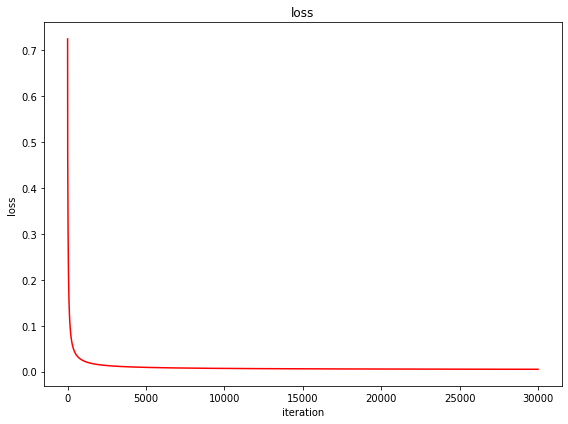

In [31]:
plot_loss_curve(loss1_iteration)

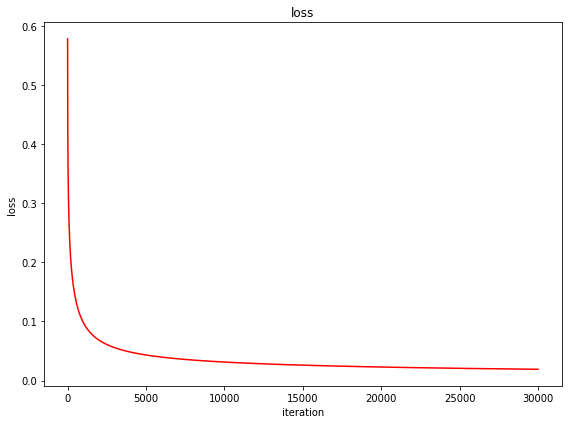

In [32]:
plot_loss_curve(loss2_iteration)

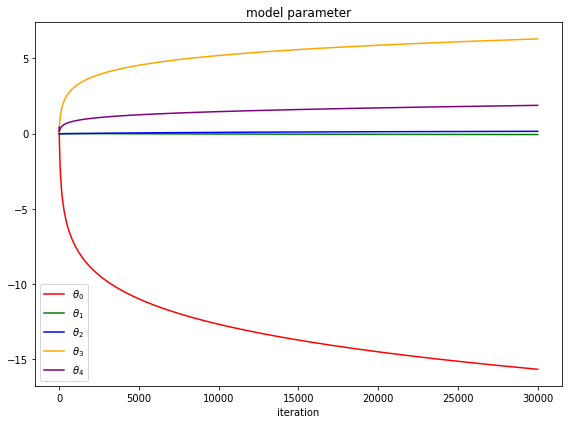

In [33]:
plot_model_parameter(theta1_iteration)

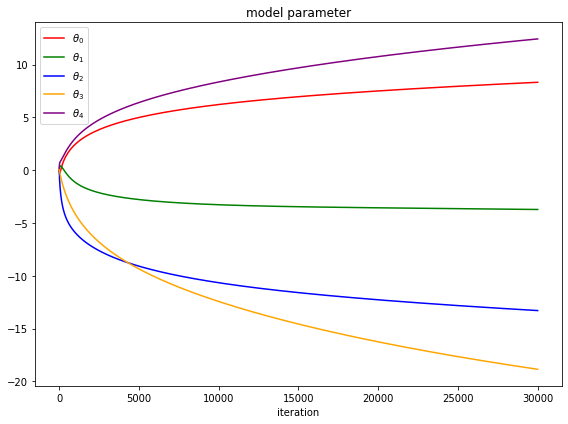

In [34]:
plot_model_parameter(theta2_iteration)

In [35]:
def plot_classifier1(data, theta):
    num_data = data.shape[0]
    point_x = np.zeros(num_data)
    point_y = np.zeros(num_data)
    label   = np.zeros(num_data)
    for i in range(num_data):
        point_x[i]  = data[i,0]
        point_y[i]  = data[i,1]
        label[i]    = data[i,2]
        
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    rx = []
    ry = []
    bx = []
    by = []
    for i in range(0, num_data):
        if label[i] == 0:
            bx.append(point_x[i])
            by.append(point_y[i])
        else:
            rx.append(point_x[i])
            ry.append(point_y[i])
    plt.plot(bx, by, 'o', color='blue', label = 'Class = 0', markersize = 3)
    plt.plot(rx, ry, 'o', color='red', label = 'Class = 1', markersize = 3)    
    
    X = np.arange(point_x1.min()-0.1,point_x1.max()+0.1,0.05)
    Y = np.arange(point_y1.min()-0.1,point_y1.max()+0.1,0.05)
    gX, gY = np.meshgrid(X, Y)
    Z = regression_function(theta, feature_function1(gX, gY))
    
    plt.contourf(gX, gY, Z,levels = 100, cmap='bwr')
    plt.colorbar()
    plt.contour(gX, gY, Z, levels= [0], colors = 'black')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

In [36]:
def plot_classifier2(data, theta):
    num_data = data.shape[0]
    point_x = np.zeros(num_data)
    point_y = np.zeros(num_data)
    label   = np.zeros(num_data)
    for i in range(num_data):
        point_x[i]  = data[i,0]
        point_y[i]  = data[i,1]
        label[i]    = data[i,2]
        
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    rx = []
    ry = []
    bx = []
    by = []
    for i in range(0, num_data):
        if label[i] == 0:
            bx.append(point_x[i])
            by.append(point_y[i])
        else:
            rx.append(point_x[i])
            ry.append(point_y[i])
    plt.plot(bx, by, 'o', color='blue', label = 'Class = 0', markersize = 3)
    plt.plot(rx, ry, 'o', color='red', label = 'Class = 1', markersize = 3)    
    
    X = np.arange(point_x2.min()-0.1,point_x2.max()+0.1,0.05)
    Y = np.arange(point_y2.min()-0.1,point_y2.max()+0.1,0.05)
    gX, gY = np.meshgrid(X, Y)
    Z = regression_function(theta, feature_function2(gX, gY))
    
    plt.contourf(gX, gY, Z,levels = 100, cmap='bwr')
    plt.colorbar()
    plt.contour(gX, gY, Z, levels= [0], colors = 'black')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

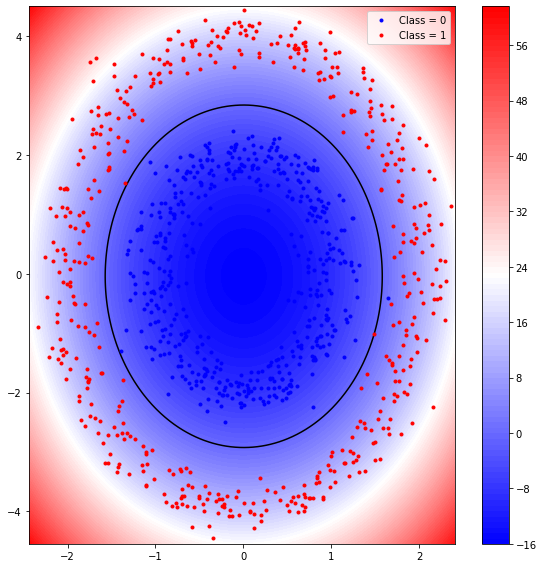

In [37]:
plot_classifier1(data1, theta1_optimal)

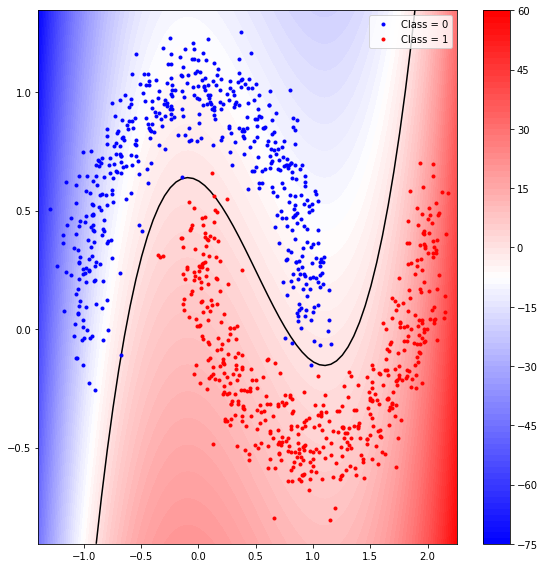

In [38]:
plot_classifier2(data2, theta2_optimal)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data (data1) from the file [assignment_09_data1.txt] in blue for class 0 and in red for class 1

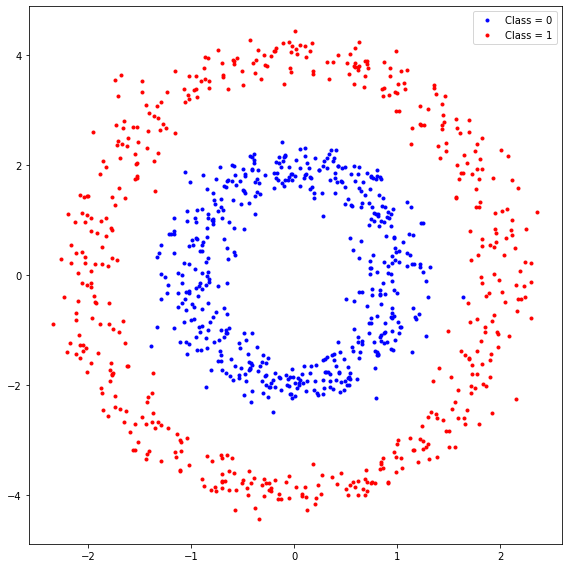

In [39]:
plot_data(data1)

### # 02. plot the input data (data2) from the file [assignment_09_data2.txt] in blue for class 0 and in red for class 1

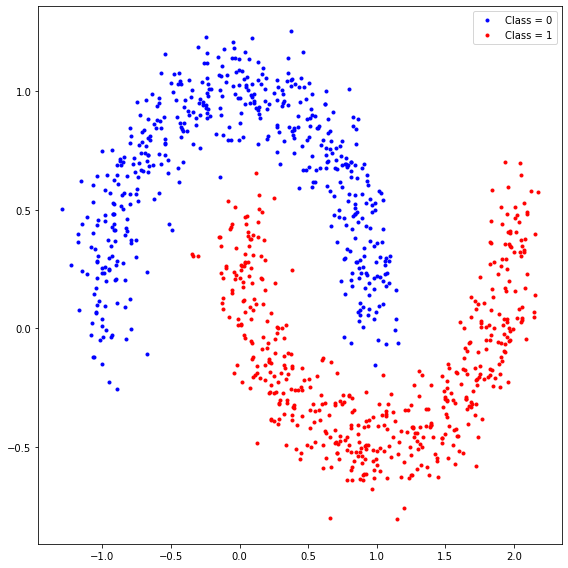

In [40]:
plot_data(data2)

### # 03. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data1

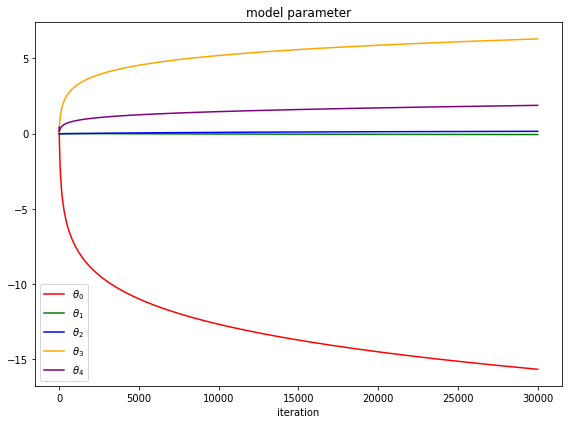

In [41]:
plot_model_parameter(theta1_iteration)

### # 04. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data2

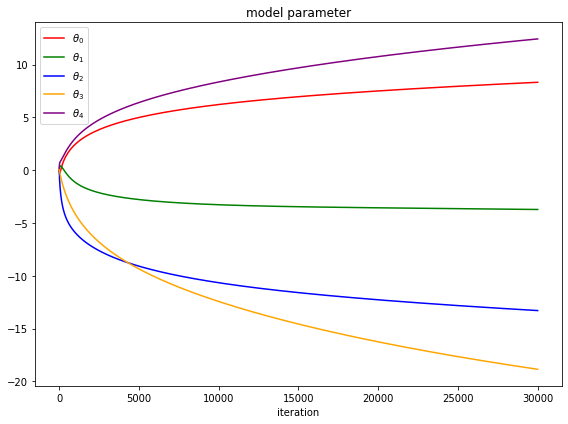

In [42]:
plot_model_parameter(theta2_iteration)

### # 05. plot the loss values in red curve over the gradient descent iterations for data1

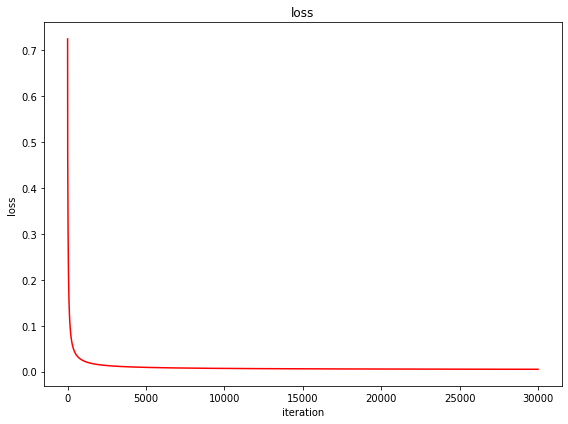

In [43]:
plot_loss_curve(loss1_iteration)

### # 06. plot the loss values in red curve over the gradient descent iterations for data2

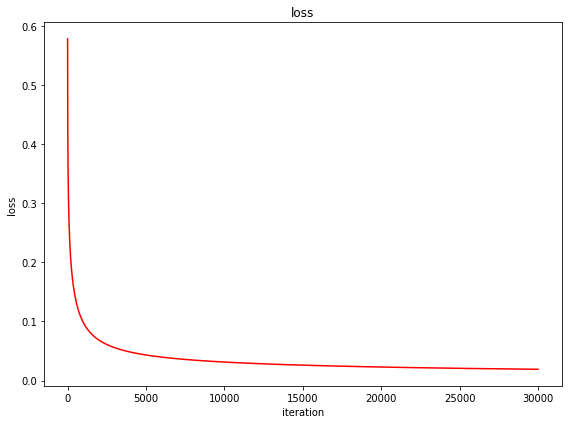

In [44]:
plot_loss_curve(loss2_iteration)

### # 07. plot the classifier with the given data points superimposed for data1

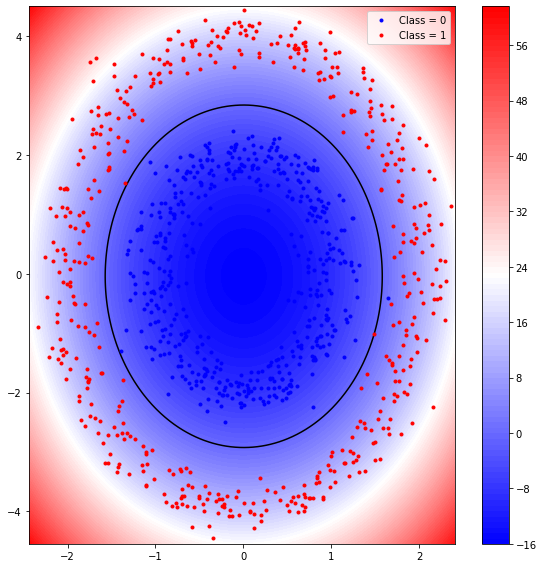

In [45]:
plot_classifier1(data1, theta1_optimal)

### # 08. plot the classifier with the given data points superimposed for data2

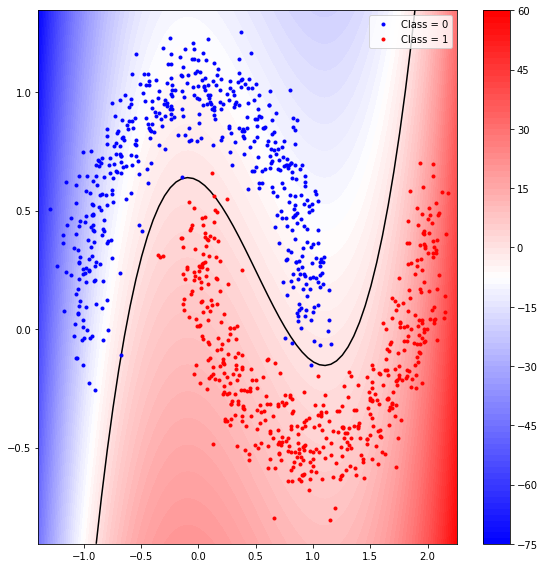

In [46]:
plot_classifier2(data2, theta2_optimal)

### # 09. print out the accuracy of the obtained classifier1 for data1

In [47]:
print(accuracy_classifier1)

0.998


### # 10. print out the accuracy of the obtained classifier2 for data1

In [48]:
print(accuracy_classifier2)

0.994
